<a href="https://colab.research.google.com/github/rodwol/PCA/blob/main/PCA_Formative_1%5BPeer_Group7%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

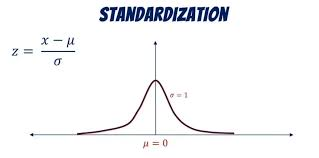


In [ ]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/rodwol/PCA/main/owid-covid-latest.csv'
data = pd.read_csv(url)
print(data.head())

   iso_code continent        location last_updated_date  total_cases  \
0       AFG      Asia     Afghanistan        2024-08-04     235214.0   
1  OWID_AFR       NaN          Africa        2024-08-04   13145380.0   
2       ALB    Europe         Albania        2024-08-04     335047.0   
3       DZA    Africa         Algeria        2024-08-04     272139.0   
4       ASM   Oceania  American Samoa        2024-08-04       8359.0   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0        0.0               0.000        7998.0         0.0   
1       36.0               5.143      259117.0         0.0   
2        0.0               0.000        3605.0         0.0   
3       18.0               2.571        6881.0         0.0   
4        0.0               0.000          34.0         0.0   

   new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
0                  0.0  ...           NaN                  37.746   
1                  0.0  ...           NaN               

In [ ]:
def standardize_data(data):
    data = data.select_dtypes(include=[np.number])
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    std[std == 0] = 1.0
    standardized_data = (data - mean)/std # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
    return standardized_data

standardized = standardize_data(data)
print(standardized.head())

   total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0    -0.200329  -0.182798           -0.182798     -0.195048   -0.152549   
1    -0.003371  -0.175367           -0.175367      0.242781   -0.152549   
2    -0.198806  -0.182798           -0.182798     -0.202708   -0.152549   
3    -0.199766  -0.179082           -0.179083     -0.196996   -0.152549   
4    -0.203790  -0.182798           -0.182798     -0.208934   -0.152549   

   new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
0             -0.15255                -0.990716              -0.268204   
1             -0.15255                -0.974258              -0.267902   
2             -0.15255                -0.427381              -0.268204   
3             -0.15255                -0.989778              -0.263421   
4             -0.15255                -0.155745              -0.268204   

   new_cases_smoothed_per_million  total_deaths_per_million  ...  \
0                       -0.268205   

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
def compute_covariance_matrix(X_std):
  """ computing covariance manually """
  n_samples = X_std.shape[0] # X_std is the standarized data
  cov_matrix = (X_std.T * X_std) / n_samples  # Calculate covariance matrix
  return cov_matrix

cov_matrix = compute_covariance_matrix(standardized)
print("Covariance matrix shape:", cov_matrix.shape)
print(cov_matrix.round(2))

Covariance matrix shape: (310, 310)
                                     0   1   2   3   4   5   6   7   8   9  \
0                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4                                  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
...                                 ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
total_vaccinations_per_hundred     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
weekly_hosp_admissions             NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
weekly_hosp_admissions_per_million NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
weekly_icu_admissions              NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
weekly_icu_admissions_per_million  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

                           

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = None  # Perform eigendecomposition
eigenvalues, eigenvectors

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = None  # Sort eigenvalues in descending order
sorted_eigenvectors = None  # Sort eigenvectors accordingly
sorted_eigenvectors

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

In [ ]:
# Step 8: Visualize Before and After PCA


print("\n--- Step 6: Visualizing Results ---")

# Create a figure to hold our two plots
plt.figure(figsize=(16, 7))

# --- PLOT 1: ORIGINAL DATA (BEFORE PCA) ---
plt.subplot(1, 2, 1)
# Let's pick two interesting original features to plot against each other
# We use the 'final_column_names' list we saved in Step 0
idx_gdp = final_column_names.index('gdp_per_capita')
idx_life = final_column_names.index('life_expectancy')
plt.scatter(X[:, idx_gdp], X[:, idx_life], alpha=0.6, c='blue')
plt.title('Before PCA: Original Data', fontsize=16)
plt.xlabel('GDP per Capita (Original)', fontsize=12)
plt.ylabel('Life Expectancy (Original)', fontsize=12)
plt.grid(True)

# --- PLOT 2: REDUCED DATA (AFTER PCA) ---
plt.subplot(1, 2, 2)
# The reduced data has two columns: PC1 and PC2
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, c='orange')
plt.title('After PCA: Reduced to 2 Dimensions', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)

plt.suptitle('PCA Dimensionality Reduction', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("\nVisualization complete.")